# Keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import keras

### Linear Function
$$ y = m*x + b + noise $$

In [10]:
m = 2
b = 3
x = np.linspace(0,50,100)
np.random.seed(101)
noise = np.random.normal(loc=0,scale=4,size=len(x))

In [11]:
y = m*x + b + noise

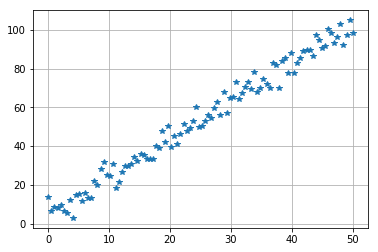

In [12]:
plt.plot(x,y,'*')
plt.grid(True);

### Neuronal Network

#### Define the Sequential model object and add the layers

In [13]:
from keras import layers, models

In [15]:
# units = number of neurons, activation = activation function, input_shape, input_dim es la dimensión de la entrada ya que x es un vector
# for instance we create three layers, the third one has just one nueron, because we want to solve a regression problem which give us a value in each register
model = models.Sequential()
# First Layer
model.add(layers.Dense(units=4,input_dim=1,activation='relu'))
# Second Layer
model.add(layers.Dense(units=4,activation='relu'))
# Output Layer
model.add(layers.Dense(units=1,activation='linear'))
# Compile
model.compile(loss='mse',optimizer='adam')

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


#### Fit the model

In [16]:
# epochs really depends on how large your dataset is...and how much training data you have....
h = model.fit(x,y,epochs=200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
100/100 [==============================] - 1s 12ms/step - loss: 3628.6337
Epoch 2/200
100/100 [==============================] - 0s 137us/step - loss: 3621.6870
Epoch 3/200
100/100 [==============================] - 0s 272us/step - loss: 3613.8580
Epoch 4/200
100/100 [==============================] - 0s 201us/step - loss: 3605.7286
Epoch 5/200
100/100 [==============================] - 0s 202us/step - loss: 3597.7736
Epoch 6/200
100/100 [==============================] - 0s 179us/step - loss: 3588.7965
Epoch 7/200
100/100 [==============================] - 0s 187us/step - loss: 3579.8384
Epoch 8/200
100/100 [==============================] - 0s 202us/step - loss: 3570.9738
Epoch 9/200
100/100 [==============================] - 0s 266us/step - loss: 3561.7076
Epoch 10/200
100/100 [==============================] - 0s 217us/step - loss: 3551.9321
Epoch 11/200
100/100 [==============================] - 0s 206us/step - loss: 3542

In [33]:
# model.history.history

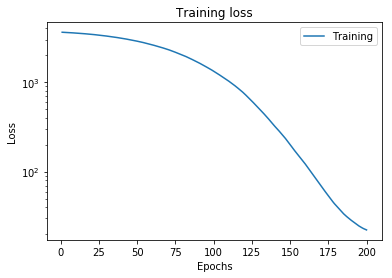

In [17]:
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

    plt.show()  

plot_metric(h,'loss')

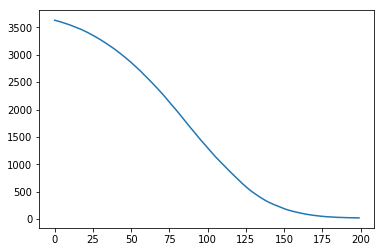

In [18]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss);

#### Predictions

In [19]:
x_for_predictions = np.linspace(0,50,100)
y_pred = model.predict(x_for_predictions)

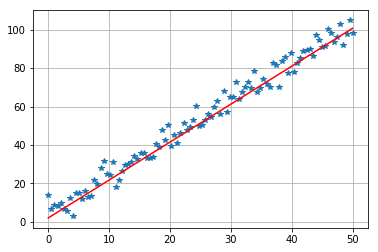

In [23]:
plt.plot(x,y,'*')
plt.plot(x_for_predictions,y_pred,'r')
plt.grid(True);

#### Evaluate the Model

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

22.033154387138378